In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import keras

# MNIST

In [2]:
def plot(model, h, values, labels):
    pred = model.predict(values, batch_size = 128)
    conf_matrix = tf.math.confusion_matrix(labels, pred.argmax(axis=1))

    figure = plt.figure(figsize=(15, 4))
    axes = figure.add_subplot(1, 2, 1)
    plt.xticks([])
    plt.yticks([])
    matr = axes.imshow(conf_matrix)
    figure.colorbar(matr)

    axes = figure.add_subplot(1, 2, 2)
    plt.xticks(range(1, len(h.history['accuracy']) + 1))
    plt.plot(h.history['accuracy'], 'r--')
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.title("Зависимость точности от количества эпох.")

    plt.show ()




Подготовим данные.

In [3]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

from keras.datasets import mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data ()

trainImages, trainLabels = normalize_img(trainImages, trainLabels)
testImages, testLabels = normalize_img(testImages, testLabels)

11490434/11490434 [==============================] - 0s 0us/step


## Однослойный персептрон.

Epoch 1/15
469/469 - 2s - loss: 1.6729 - categorical_crossentropy: 1.6729 - accuracy: 0.5599 - 2s/epoch - 3ms/step
Epoch 2/15
469/469 - 1s - loss: 0.9928 - categorical_crossentropy: 0.9928 - accuracy: 0.8031 - 1s/epoch - 2ms/step
Epoch 3/15
469/469 - 1s - loss: 0.7389 - categorical_crossentropy: 0.7389 - accuracy: 0.8428 - 1s/epoch - 2ms/step
Epoch 4/15
469/469 - 1s - loss: 0.6130 - categorical_crossentropy: 0.6130 - accuracy: 0.8601 - 1s/epoch - 3ms/step
Epoch 5/15
469/469 - 1s - loss: 0.5379 - categorical_crossentropy: 0.5379 - accuracy: 0.8705 - 1s/epoch - 3ms/step
Epoch 6/15
469/469 - 1s - loss: 0.4879 - categorical_crossentropy: 0.4879 - accuracy: 0.8788 - 1s/epoch - 3ms/step
Epoch 7/15
469/469 - 2s - loss: 0.4522 - categorical_crossentropy: 0.4522 - accuracy: 0.8842 - 2s/epoch - 4ms/step
Epoch 8/15
469/469 - 2s - loss: 0.4253 - categorical_crossentropy: 0.4253 - accuracy: 0.8894 - 2s/epoch - 4ms/step
Epoch 9/15
469/469 - 1s - loss: 0.4045 - categorical_crossentropy: 0.4045 - accu

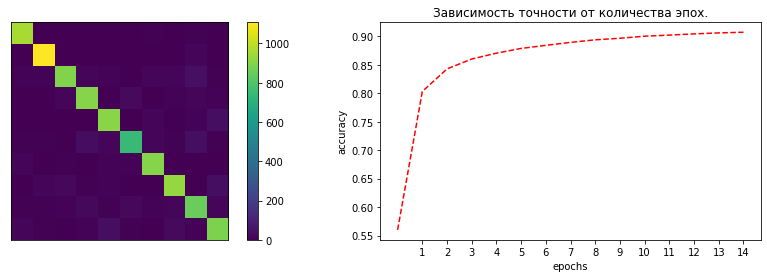

In [12]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 15, batch_size = 128, verbose = 2)
plot(model, h, testImages, testLabels)

Epoch 1/15
469/469 - 1s - loss: 1.2901 - categorical_crossentropy: 1.2901 - accuracy: 0.6900 - 1s/epoch - 3ms/step
Epoch 2/15
469/469 - 1s - loss: 0.7185 - categorical_crossentropy: 0.7185 - accuracy: 0.8403 - 984ms/epoch - 2ms/step
Epoch 3/15
469/469 - 1s - loss: 0.5890 - categorical_crossentropy: 0.5890 - accuracy: 0.8589 - 988ms/epoch - 2ms/step
Epoch 4/15
469/469 - 1s - loss: 0.5269 - categorical_crossentropy: 0.5269 - accuracy: 0.8687 - 975ms/epoch - 2ms/step
Epoch 5/15
469/469 - 1s - loss: 0.4890 - categorical_crossentropy: 0.4890 - accuracy: 0.8753 - 983ms/epoch - 2ms/step
Epoch 6/15
469/469 - 1s - loss: 0.4631 - categorical_crossentropy: 0.4631 - accuracy: 0.8796 - 1s/epoch - 2ms/step
Epoch 7/15
469/469 - 1s - loss: 0.4438 - categorical_crossentropy: 0.4438 - accuracy: 0.8827 - 999ms/epoch - 2ms/step
Epoch 8/15
469/469 - 1s - loss: 0.4288 - categorical_crossentropy: 0.4288 - accuracy: 0.8852 - 983ms/epoch - 2ms/step
Epoch 9/15
469/469 - 1s - loss: 0.4167 - categorical_crossentr

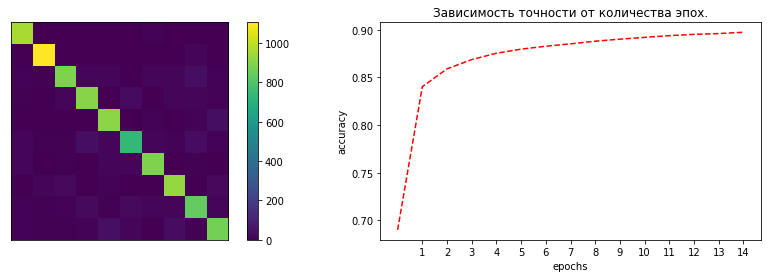

In [13]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (keras.layers.Dense (10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer= 'sgd', metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 15, batch_size = 128, verbose = 2)
plot(model, h, testImages, testLabels)


Epoch 1/15
938/938 - 2s - loss: 1.3641 - categorical_crossentropy: 1.3641 - accuracy: 0.6731 - 2s/epoch - 2ms/step
Epoch 2/15
938/938 - 2s - loss: 0.7121 - categorical_crossentropy: 0.7121 - accuracy: 0.8509 - 2s/epoch - 2ms/step
Epoch 3/15
938/938 - 2s - loss: 0.5420 - categorical_crossentropy: 0.5420 - accuracy: 0.8717 - 2s/epoch - 2ms/step
Epoch 4/15
938/938 - 2s - loss: 0.4638 - categorical_crossentropy: 0.4638 - accuracy: 0.8833 - 2s/epoch - 2ms/step
Epoch 5/15
938/938 - 2s - loss: 0.4186 - categorical_crossentropy: 0.4186 - accuracy: 0.8904 - 2s/epoch - 2ms/step
Epoch 6/15
938/938 - 2s - loss: 0.3893 - categorical_crossentropy: 0.3893 - accuracy: 0.8960 - 2s/epoch - 2ms/step
Epoch 7/15
938/938 - 2s - loss: 0.3689 - categorical_crossentropy: 0.3689 - accuracy: 0.9009 - 2s/epoch - 2ms/step
Epoch 8/15
938/938 - 2s - loss: 0.3539 - categorical_crossentropy: 0.3539 - accuracy: 0.9040 - 2s/epoch - 2ms/step
Epoch 9/15
938/938 - 2s - loss: 0.3425 - categorical_crossentropy: 0.3425 - accu

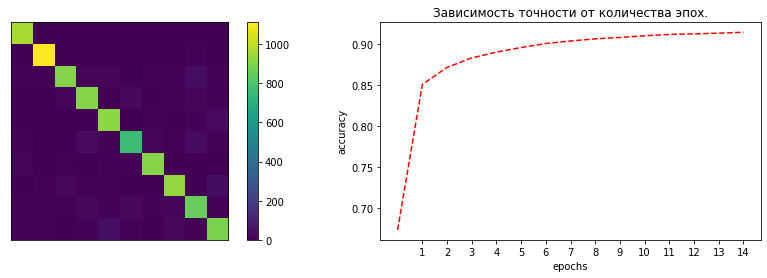

In [14]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 15, batch_size = 64, verbose = 2)
plot(model, h, testImages, testLabels)

Epoch 1/20
1875/1875 - 5s - loss: 1.1528 - categorical_crossentropy: 1.1528 - accuracy: 0.7219 - 5s/epoch - 3ms/step
Epoch 2/20
1875/1875 - 3s - loss: 0.5566 - categorical_crossentropy: 0.5566 - accuracy: 0.8683 - 3s/epoch - 2ms/step
Epoch 3/20
1875/1875 - 3s - loss: 0.4393 - categorical_crossentropy: 0.4393 - accuracy: 0.8875 - 3s/epoch - 2ms/step
Epoch 4/20
1875/1875 - 3s - loss: 0.3889 - categorical_crossentropy: 0.3889 - accuracy: 0.8969 - 3s/epoch - 2ms/step
Epoch 5/20
1875/1875 - 3s - loss: 0.3611 - categorical_crossentropy: 0.3611 - accuracy: 0.9025 - 3s/epoch - 2ms/step
Epoch 6/20
1875/1875 - 3s - loss: 0.3431 - categorical_crossentropy: 0.3431 - accuracy: 0.9068 - 3s/epoch - 2ms/step
Epoch 7/20
1875/1875 - 4s - loss: 0.3307 - categorical_crossentropy: 0.3307 - accuracy: 0.9095 - 4s/epoch - 2ms/step
Epoch 8/20
1875/1875 - 3s - loss: 0.3213 - categorical_crossentropy: 0.3213 - accuracy: 0.9112 - 3s/epoch - 2ms/step
Epoch 9/20
1875/1875 - 3s - loss: 0.3138 - categorical_crossentr

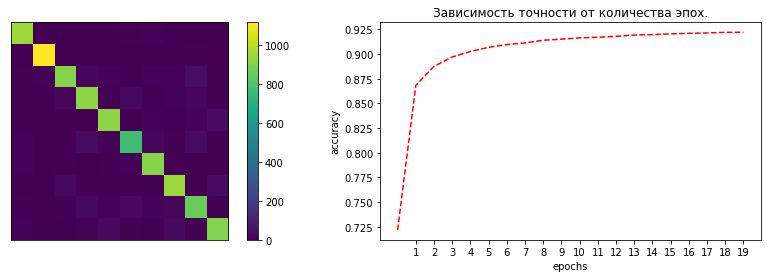

In [15]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 20, batch_size = 32, verbose = 2)
plot(model, h, testImages, testLabels)

Наивысшая точность однослойного персептрона - 92%. При этом обучение выполняется очень долго из-за малого размера батча.

## Многослойный персептрон

Epoch 1/15
469/469 - 5s - loss: 1.1085 - categorical_crossentropy: 1.1085 - accuracy: 0.7252 - 5s/epoch - 11ms/step
Epoch 2/15
469/469 - 2s - loss: 0.4406 - categorical_crossentropy: 0.4406 - accuracy: 0.8904 - 2s/epoch - 5ms/step
Epoch 3/15
469/469 - 2s - loss: 0.3440 - categorical_crossentropy: 0.3440 - accuracy: 0.9075 - 2s/epoch - 5ms/step
Epoch 4/15
469/469 - 2s - loss: 0.2999 - categorical_crossentropy: 0.2999 - accuracy: 0.9180 - 2s/epoch - 5ms/step
Epoch 5/15
469/469 - 2s - loss: 0.2717 - categorical_crossentropy: 0.2717 - accuracy: 0.9256 - 2s/epoch - 5ms/step
Epoch 6/15
469/469 - 2s - loss: 0.2508 - categorical_crossentropy: 0.2508 - accuracy: 0.9309 - 2s/epoch - 4ms/step
Epoch 7/15
469/469 - 2s - loss: 0.2337 - categorical_crossentropy: 0.2337 - accuracy: 0.9358 - 2s/epoch - 4ms/step
Epoch 8/15
469/469 - 2s - loss: 0.2198 - categorical_crossentropy: 0.2198 - accuracy: 0.9397 - 2s/epoch - 4ms/step
Epoch 9/15
469/469 - 2s - loss: 0.2073 - categorical_crossentropy: 0.2073 - acc

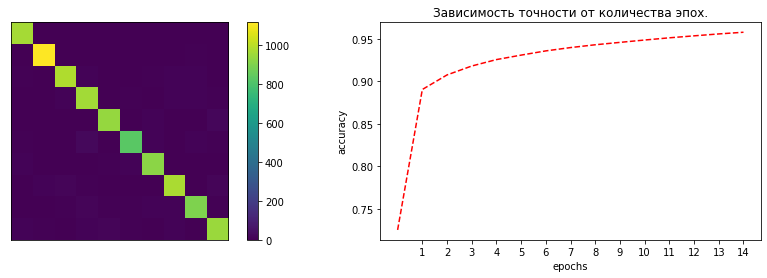

In [16]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (tf.keras.layers.Dense(100, activation='relu'))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 15, batch_size = 128, verbose = 2)
plot(model, h, testImages, testLabels)

Epoch 1/15
469/469 - 5s - loss: 0.9550 - categorical_crossentropy: 0.9550 - accuracy: 0.7694 - 5s/epoch - 11ms/step
Epoch 2/15
469/469 - 4s - loss: 0.3963 - categorical_crossentropy: 0.3963 - accuracy: 0.8974 - 4s/epoch - 9ms/step
Epoch 3/15
469/469 - 5s - loss: 0.3179 - categorical_crossentropy: 0.3179 - accuracy: 0.9138 - 5s/epoch - 10ms/step
Epoch 4/15
469/469 - 4s - loss: 0.2790 - categorical_crossentropy: 0.2790 - accuracy: 0.9230 - 4s/epoch - 8ms/step
Epoch 5/15
469/469 - 3s - loss: 0.2521 - categorical_crossentropy: 0.2521 - accuracy: 0.9304 - 3s/epoch - 7ms/step
Epoch 6/15
469/469 - 4s - loss: 0.2308 - categorical_crossentropy: 0.2308 - accuracy: 0.9362 - 4s/epoch - 9ms/step
Epoch 7/15
469/469 - 4s - loss: 0.2131 - categorical_crossentropy: 0.2131 - accuracy: 0.9406 - 4s/epoch - 8ms/step
Epoch 8/15
469/469 - 4s - loss: 0.1974 - categorical_crossentropy: 0.1974 - accuracy: 0.9456 - 4s/epoch - 8ms/step
Epoch 9/15
469/469 - 4s - loss: 0.1840 - categorical_crossentropy: 0.1840 - ac

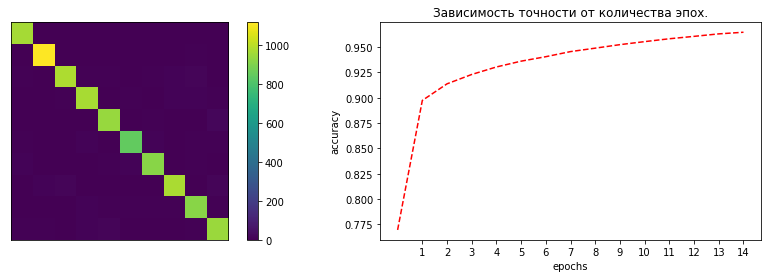

In [17]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (tf.keras.layers.Dense(150, activation='relu'))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 15, batch_size = 128, verbose = 2)
plot(model, h, testImages, testLabels)

Epoch 1/15
469/469 - 2s - loss: 1.2142 - categorical_crossentropy: 1.2142 - accuracy: 0.7037 - 2s/epoch - 5ms/step
Epoch 2/15
469/469 - 2s - loss: 0.5571 - categorical_crossentropy: 0.5571 - accuracy: 0.8632 - 2s/epoch - 4ms/step
Epoch 3/15
469/469 - 2s - loss: 0.4410 - categorical_crossentropy: 0.4410 - accuracy: 0.8835 - 2s/epoch - 4ms/step
Epoch 4/15
469/469 - 2s - loss: 0.3898 - categorical_crossentropy: 0.3898 - accuracy: 0.8935 - 2s/epoch - 4ms/step
Epoch 5/15
469/469 - 2s - loss: 0.3590 - categorical_crossentropy: 0.3590 - accuracy: 0.9007 - 2s/epoch - 4ms/step
Epoch 6/15
469/469 - 2s - loss: 0.3376 - categorical_crossentropy: 0.3376 - accuracy: 0.9059 - 2s/epoch - 4ms/step
Epoch 7/15
469/469 - 2s - loss: 0.3211 - categorical_crossentropy: 0.3211 - accuracy: 0.9096 - 2s/epoch - 4ms/step
Epoch 8/15
469/469 - 2s - loss: 0.3076 - categorical_crossentropy: 0.3076 - accuracy: 0.9131 - 2s/epoch - 4ms/step
Epoch 9/15
469/469 - 2s - loss: 0.2964 - categorical_crossentropy: 0.2964 - accu

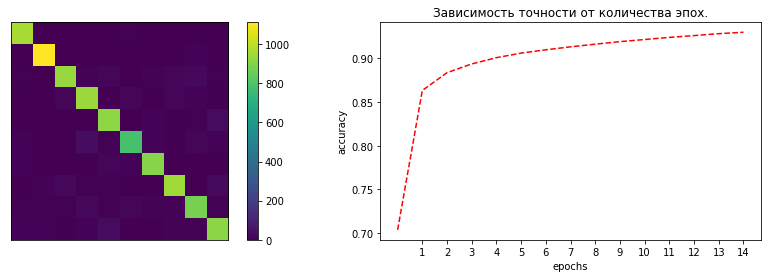

In [18]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (tf.keras.layers.Dense(100, activation='relu'))
model.add (keras.layers.Dense (10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 15, batch_size = 128, verbose = 2)
plot(model, h, testImages, testLabels)

Epoch 1/15
938/938 - 4s - loss: 0.7160 - categorical_crossentropy: 0.7160 - accuracy: 0.8292 - 4s/epoch - 5ms/step
Epoch 2/15
938/938 - 4s - loss: 0.3223 - categorical_crossentropy: 0.3223 - accuracy: 0.9144 - 4s/epoch - 4ms/step
Epoch 3/15
938/938 - 4s - loss: 0.2639 - categorical_crossentropy: 0.2639 - accuracy: 0.9284 - 4s/epoch - 4ms/step
Epoch 4/15
938/938 - 4s - loss: 0.2304 - categorical_crossentropy: 0.2304 - accuracy: 0.9372 - 4s/epoch - 4ms/step
Epoch 5/15
938/938 - 4s - loss: 0.2064 - categorical_crossentropy: 0.2064 - accuracy: 0.9430 - 4s/epoch - 4ms/step
Epoch 6/15
938/938 - 4s - loss: 0.1873 - categorical_crossentropy: 0.1873 - accuracy: 0.9479 - 4s/epoch - 4ms/step
Epoch 7/15
938/938 - 4s - loss: 0.1722 - categorical_crossentropy: 0.1722 - accuracy: 0.9525 - 4s/epoch - 4ms/step
Epoch 8/15
938/938 - 4s - loss: 0.1591 - categorical_crossentropy: 0.1591 - accuracy: 0.9558 - 4s/epoch - 4ms/step
Epoch 9/15
938/938 - 3s - loss: 0.1477 - categorical_crossentropy: 0.1477 - accu

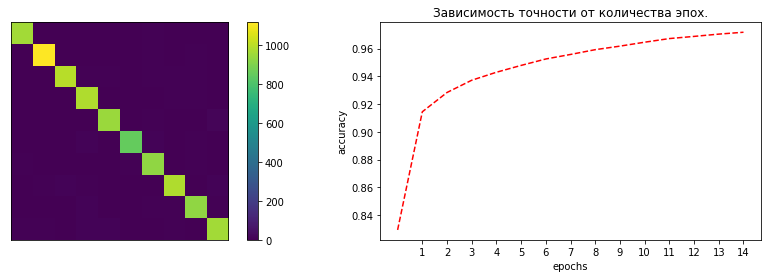

In [19]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (tf.keras.layers.Dense(150, activation='relu'))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 15, batch_size = 64, verbose = 2)
plot(model, h, testImages, testLabels)

Epoch 1/20
1875/1875 - 6s - loss: 0.5909 - categorical_crossentropy: 0.5909 - accuracy: 0.8522 - 6s/epoch - 3ms/step
Epoch 2/20
1875/1875 - 5s - loss: 0.2827 - categorical_crossentropy: 0.2827 - accuracy: 0.9226 - 5s/epoch - 3ms/step
Epoch 3/20
1875/1875 - 5s - loss: 0.2295 - categorical_crossentropy: 0.2295 - accuracy: 0.9366 - 5s/epoch - 3ms/step
Epoch 4/20
1875/1875 - 5s - loss: 0.1961 - categorical_crossentropy: 0.1961 - accuracy: 0.9454 - 5s/epoch - 3ms/step
Epoch 5/20
1875/1875 - 5s - loss: 0.1714 - categorical_crossentropy: 0.1714 - accuracy: 0.9520 - 5s/epoch - 3ms/step
Epoch 6/20
1875/1875 - 6s - loss: 0.1525 - categorical_crossentropy: 0.1525 - accuracy: 0.9576 - 6s/epoch - 3ms/step
Epoch 7/20
1875/1875 - 5s - loss: 0.1367 - categorical_crossentropy: 0.1367 - accuracy: 0.9618 - 5s/epoch - 3ms/step
Epoch 8/20
1875/1875 - 5s - loss: 0.1240 - categorical_crossentropy: 0.1240 - accuracy: 0.9658 - 5s/epoch - 3ms/step
Epoch 9/20
1875/1875 - 5s - loss: 0.1130 - categorical_crossentr

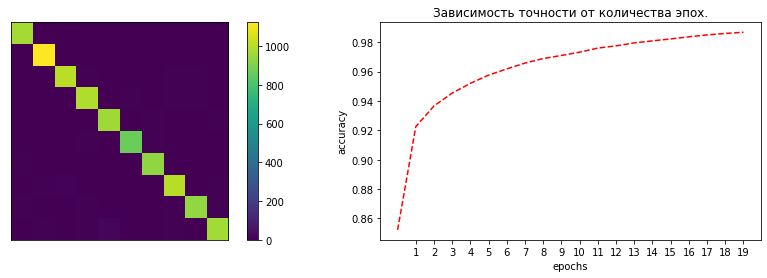

In [20]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (tf.keras.layers.Dense(150, activation='relu'))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 20, batch_size = 32, verbose = 2)
plot(model, h, testImages, testLabels)

Epoch 1/20
1875/1875 - 6s - loss: 0.5253 - categorical_crossentropy: 0.5253 - accuracy: 0.8646 - 6s/epoch - 3ms/step
Epoch 2/20
1875/1875 - 6s - loss: 0.2280 - categorical_crossentropy: 0.2280 - accuracy: 0.9367 - 6s/epoch - 3ms/step
Epoch 3/20
1875/1875 - 7s - loss: 0.1761 - categorical_crossentropy: 0.1761 - accuracy: 0.9509 - 7s/epoch - 4ms/step
Epoch 4/20
1875/1875 - 6s - loss: 0.1452 - categorical_crossentropy: 0.1452 - accuracy: 0.9596 - 6s/epoch - 3ms/step
Epoch 5/20
1875/1875 - 8s - loss: 0.1232 - categorical_crossentropy: 0.1232 - accuracy: 0.9649 - 8s/epoch - 4ms/step
Epoch 6/20
1875/1875 - 7s - loss: 0.1065 - categorical_crossentropy: 0.1065 - accuracy: 0.9697 - 7s/epoch - 3ms/step
Epoch 7/20
1875/1875 - 7s - loss: 0.0931 - categorical_crossentropy: 0.0931 - accuracy: 0.9736 - 7s/epoch - 4ms/step
Epoch 8/20
1875/1875 - 6s - loss: 0.0821 - categorical_crossentropy: 0.0821 - accuracy: 0.9769 - 6s/epoch - 3ms/step
Epoch 9/20
1875/1875 - 6s - loss: 0.0730 - categorical_crossentr

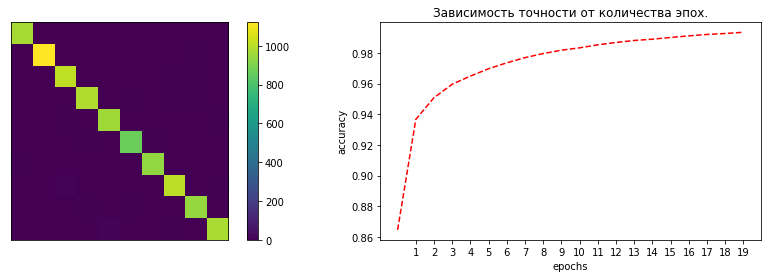

In [21]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (tf.keras.layers.Dense(150, activation='relu'))
model.add (tf.keras.layers.Dense(75, activation='relu'))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 20, batch_size = 32, verbose = 2)
plot(model, h, testImages, testLabels)

Уже у двухслойной модели легко достигается точность в 95%, а при подборе гиперпараметров - в 98%. Увеличение количества слоев позволяет достигнуть точности в 99,3%

# FashionMNIST

In [25]:
from keras.datasets import fashion_mnist
(trainImages, trainLabels), (testImages, testLabels) = fashion_mnist.load_data ()

trainImages, trainLabels = normalize_img(trainImages, trainLabels)
testImages, testLabels = normalize_img(testImages, testLabels)

4422102/4422102 [==============================] - 0s 0us/step


Точность однослойной модели - 85%

Epoch 1/20
1875/1875 - 4s - loss: 1.0187 - categorical_crossentropy: 1.0187 - accuracy: 0.6838 - 4s/epoch - 2ms/step
Epoch 2/20
1875/1875 - 4s - loss: 0.6600 - categorical_crossentropy: 0.6600 - accuracy: 0.7834 - 4s/epoch - 2ms/step
Epoch 3/20
1875/1875 - 4s - loss: 0.5822 - categorical_crossentropy: 0.5822 - accuracy: 0.8073 - 4s/epoch - 2ms/step
Epoch 4/20
1875/1875 - 4s - loss: 0.5422 - categorical_crossentropy: 0.5422 - accuracy: 0.8208 - 4s/epoch - 2ms/step
Epoch 5/20
1875/1875 - 3s - loss: 0.5169 - categorical_crossentropy: 0.5169 - accuracy: 0.8271 - 3s/epoch - 2ms/step
Epoch 6/20
1875/1875 - 3s - loss: 0.4996 - categorical_crossentropy: 0.4996 - accuracy: 0.8323 - 3s/epoch - 2ms/step
Epoch 7/20
1875/1875 - 5s - loss: 0.4862 - categorical_crossentropy: 0.4862 - accuracy: 0.8368 - 5s/epoch - 3ms/step
Epoch 8/20
1875/1875 - 5s - loss: 0.4760 - categorical_crossentropy: 0.4760 - accuracy: 0.8398 - 5s/epoch - 3ms/step
Epoch 9/20
1875/1875 - 3s - loss: 0.4674 - categorical_crossentr

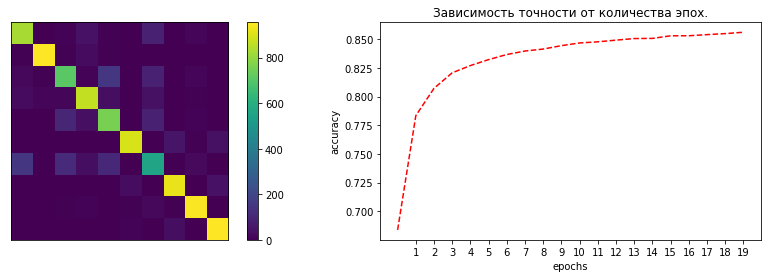

In [26]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 20, batch_size = 32, verbose = 2)
plot(model, h, testImages, testLabels)

Точность многослойной модели - 91%

Epoch 1/20
1875/1875 - 7s - loss: 0.6739 - categorical_crossentropy: 0.6739 - accuracy: 0.7794 - 7s/epoch - 4ms/step
Epoch 2/20
1875/1875 - 8s - loss: 0.4436 - categorical_crossentropy: 0.4436 - accuracy: 0.8458 - 8s/epoch - 4ms/step
Epoch 3/20
1875/1875 - 6s - loss: 0.4011 - categorical_crossentropy: 0.4011 - accuracy: 0.8596 - 6s/epoch - 3ms/step
Epoch 4/20
1875/1875 - 6s - loss: 0.3769 - categorical_crossentropy: 0.3769 - accuracy: 0.8677 - 6s/epoch - 3ms/step
Epoch 5/20
1875/1875 - 6s - loss: 0.3584 - categorical_crossentropy: 0.3584 - accuracy: 0.8739 - 6s/epoch - 3ms/step
Epoch 6/20
1875/1875 - 6s - loss: 0.3437 - categorical_crossentropy: 0.3437 - accuracy: 0.8777 - 6s/epoch - 3ms/step
Epoch 7/20
1875/1875 - 6s - loss: 0.3297 - categorical_crossentropy: 0.3297 - accuracy: 0.8827 - 6s/epoch - 3ms/step
Epoch 8/20
1875/1875 - 6s - loss: 0.3200 - categorical_crossentropy: 0.3200 - accuracy: 0.8855 - 6s/epoch - 3ms/step
Epoch 9/20
1875/1875 - 6s - loss: 0.3099 - categorical_crossentr

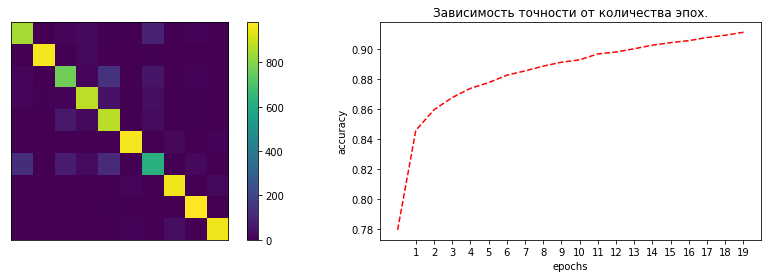

In [27]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(28, 28)))
model.add (tf.keras.layers.Dense(150, activation='relu'))
model.add (tf.keras.layers.Dense(75, activation='relu'))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 20, batch_size = 32, verbose = 2)
plot(model, h, testImages, testLabels)

# CIFAR-10

In [31]:
from keras.datasets import cifar10
(trainImages, trainLabels), (testImages, testLabels) = cifar10.load_data ()

trainImages, trainLabels = normalize_img(trainImages, trainLabels)
testImages, testLabels = normalize_img(testImages, testLabels)

170498071/170498071 [==============================] - 3s 0us/step


Epoch 1/20
391/391 - 5s - loss: 2.0852 - categorical_crossentropy: 2.0852 - accuracy: 0.2506 - 5s/epoch - 12ms/step
Epoch 2/20
391/391 - 2s - loss: 1.9110 - categorical_crossentropy: 1.9110 - accuracy: 0.3313 - 2s/epoch - 4ms/step
Epoch 3/20
391/391 - 2s - loss: 1.8625 - categorical_crossentropy: 1.8625 - accuracy: 0.3519 - 2s/epoch - 4ms/step
Epoch 4/20
391/391 - 2s - loss: 1.8341 - categorical_crossentropy: 1.8341 - accuracy: 0.3644 - 2s/epoch - 4ms/step
Epoch 5/20
391/391 - 2s - loss: 1.8159 - categorical_crossentropy: 1.8159 - accuracy: 0.3715 - 2s/epoch - 4ms/step
Epoch 6/20
391/391 - 2s - loss: 1.8032 - categorical_crossentropy: 1.8032 - accuracy: 0.3750 - 2s/epoch - 4ms/step
Epoch 7/20
391/391 - 2s - loss: 1.7917 - categorical_crossentropy: 1.7917 - accuracy: 0.3817 - 2s/epoch - 4ms/step
Epoch 8/20
391/391 - 2s - loss: 1.7830 - categorical_crossentropy: 1.7830 - accuracy: 0.3846 - 2s/epoch - 4ms/step
Epoch 9/20
391/391 - 2s - loss: 1.7758 - categorical_crossentropy: 1.7758 - acc

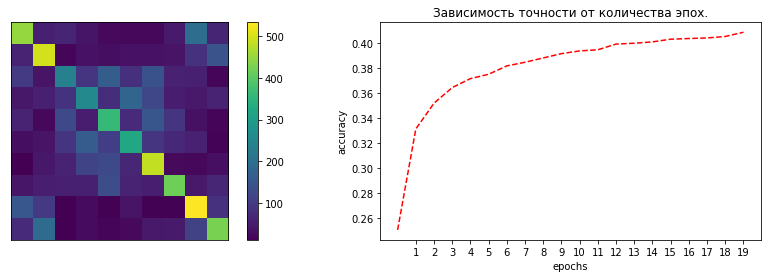

In [36]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 20, batch_size = 128, verbose = 2)
plot(model, h, testImages, testLabels)

Epoch 1/20
391/391 - 21s - loss: 1.8223 - categorical_crossentropy: 1.8223 - accuracy: 0.3520 - 21s/epoch - 55ms/step
Epoch 2/20
391/391 - 20s - loss: 1.6377 - categorical_crossentropy: 1.6377 - accuracy: 0.4228 - 20s/epoch - 52ms/step
Epoch 3/20
391/391 - 20s - loss: 1.5583 - categorical_crossentropy: 1.5583 - accuracy: 0.4504 - 20s/epoch - 51ms/step
Epoch 4/20
391/391 - 20s - loss: 1.4994 - categorical_crossentropy: 1.4994 - accuracy: 0.4711 - 20s/epoch - 51ms/step
Epoch 5/20
391/391 - 20s - loss: 1.4459 - categorical_crossentropy: 1.4459 - accuracy: 0.4918 - 20s/epoch - 51ms/step
Epoch 6/20
391/391 - 21s - loss: 1.4087 - categorical_crossentropy: 1.4087 - accuracy: 0.5062 - 21s/epoch - 54ms/step
Epoch 7/20
391/391 - 20s - loss: 1.3713 - categorical_crossentropy: 1.3713 - accuracy: 0.5185 - 20s/epoch - 51ms/step
Epoch 8/20
391/391 - 20s - loss: 1.3365 - categorical_crossentropy: 1.3365 - accuracy: 0.5322 - 20s/epoch - 51ms/step
Epoch 9/20
391/391 - 20s - loss: 1.3012 - categorical_cr

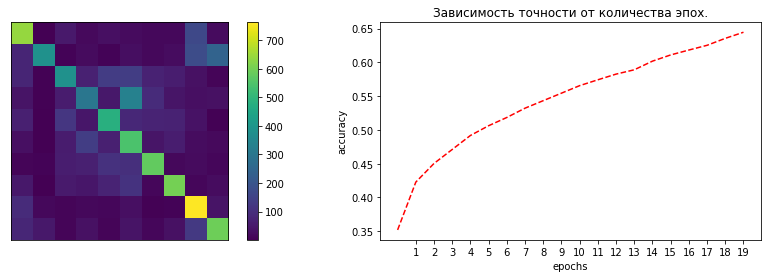

In [39]:
model = keras.models.Sequential()
model.add (keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add (tf.keras.layers.Dense(1000, activation='relu'))
model.add (tf.keras.layers.Dense(500, activation='relu'))
model.add (keras.layers.Dense (10, activation = 'softmax'))

opt = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['categorical_crossentropy', 'accuracy'])

h = model.fit (trainImages, keras.utils.to_categorical (trainLabels), epochs = 20, batch_size = 128, verbose = 2)
plot(model, h, testImages, testLabels)

На CIFAR модель работает существенно хуже. Лучший результат дает трехслойная сеть с сильно увеличенным количеством нейронов. На такой модели достигается результат в 64%.